# 1. CNN 기반 당뇨병 분류 모델 구현

Epoch 1/20


C:\Users\tksmd\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.6167 - loss: 0.8338 - val_accuracy: 0.5691 - val_loss: 0.6811
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6550 - loss: 0.7496 - val_accuracy: 0.6098 - val_loss: 0.6658
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7352 - loss: 0.6035 - val_accuracy: 0.6911 - val_loss: 0.6381
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7098 - loss: 0.5999 - val_accuracy: 0.7480 - val_loss: 0.6155
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7753 - loss: 0.5288 - val_accuracy: 0.7886 - val_loss: 0.6001
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7461 - loss: 0.5072 - val_accuracy: 0.7561 - val_loss: 0.5946
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7272 - loss: 0.5758 - val_accuracy: 0.7236 - val_loss: 0.5828
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7572 - loss: 0.5277 - val_accuracy: 0.7967 - val_loss: 0.5655
Ep

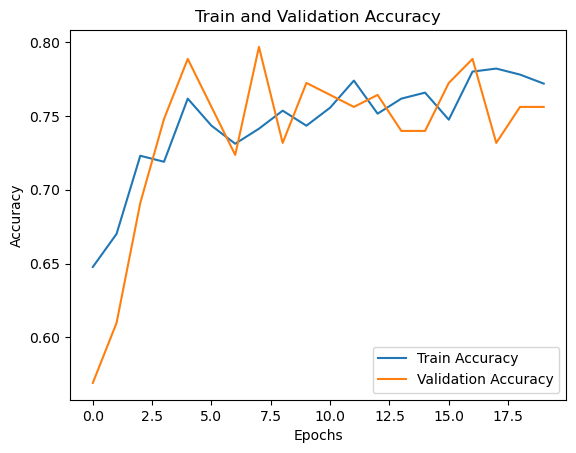

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# 데이터 로드
url = 'https://github.com/MyungKyuYi/AI-class/raw/main/diabetes.csv'
data = pd.read_csv(url)

# 1. EDA 및 데이터 전처리
# X는 'Outcome'을 제외한 나머지 특성, y는 예측할 레이블 'Outcome'
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# 표준화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# CNN은 1D 입력을 필요로 하므로 차원을 추가 (표형 데이터를 CNN에 맞게 변환)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# 2. CNN 모델 구성 (MaxPooling 제거)
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.25),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # 이진 분류이므로 sigmoid 사용
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 3. 모델 학습 및 저장
checkpoint = ModelCheckpoint('cnn_diabetes_model.keras', monitor='val_loss', save_best_only=True, mode='min')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

# 4. 성능 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"CNN 분류 모델 정확도: {accuracy:.4f}")

# 학습 곡선 시각화
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 2. 모델 저장 후 불러오기

In [5]:
from tensorflow.keras.models import load_model

# 1. 저장된 모델 불러오기
base_model = load_model('cnn_diabetes_model.keras')

# 2. 기존 모델의 층을 고정 (Fine-tuning을 위해 기존 학습된 층은 고정)
for layer in base_model.layers:
    layer.trainable = False

# 3. 새로운 모델 구성 (추가 층 및 출력층 추가)
fine_tune_model = Sequential([
    base_model,  # 사전 학습된 모델을 기반으로
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # 이진 분류 출력층
])

# 모델 컴파일
fine_tune_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


# 3. Fine-tuning (미세 조정)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5661 - loss: 0.6929 - val_accuracy: 0.6504 - val_loss: 0.6923
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5959 - loss: 0.6935 - val_accuracy: 0.6504 - val_loss: 0.6914
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5932 - loss: 0.6956 - val_accuracy: 0.6504 - val_loss: 0.6906
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6654 - loss: 0.6888 - val_accuracy: 0.6504 - val_loss: 0.6897
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6704 - loss: 0.6899 - val_accuracy: 0.6504 - val_loss: 0.6889
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6916 - loss: 0.6878 - val_accuracy: 0.6504 - val_loss: 0.6881
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6899 - loss: 0.6857 - val_accuracy: 0.6504 - val_loss: 0.6873
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6955 - loss: 0.6849 - val_accuracy: 0.6504 - val_loss

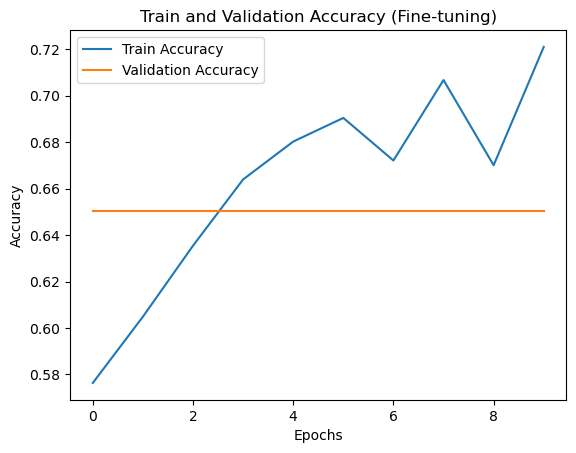

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

# 1. 저장된 모델 불러오기
base_model = load_model('cnn_diabetes_model.keras')

# 2. 기존 모델의 층을 고정 (Fine-tuning을 위해 기존 학습된 층은 고정)
for layer in base_model.layers:
    layer.trainable = False

# 3. 새로운 모델 구성 (기존 Sequential 모델에 새로운 층 추가)
fine_tune_model = Sequential(base_model.layers)  # 기존 모델 레이어들 추가
fine_tune_model.add(Dense(64, activation='relu'))  # 새로운 Dense 층 추가
fine_tune_model.add(Dropout(0.5))  # Dropout 추가
fine_tune_model.add(Dense(1, activation='sigmoid'))  # 이진 분류 출력층 추가

# 4. 모델 컴파일
fine_tune_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 5. Fine-tuning 모델 학습
fine_tune_history = fine_tune_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 6. 성능 평가
loss, accuracy = fine_tune_model.evaluate(X_test, y_test)
print(f"Fine-tuned 모델 정확도: {accuracy:.4f}")

# 학습 곡선 시각화
plt.plot(fine_tune_history.history['accuracy'], label='Train Accuracy')
plt.plot(fine_tune_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy (Fine-tuning)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
